In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from scipy import stats
from sklearn.svm import SVC

filename='heart.csv'
df = pd.read_csv('heart.csv')


In [2]:
#information about dataset, type, columns names, null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


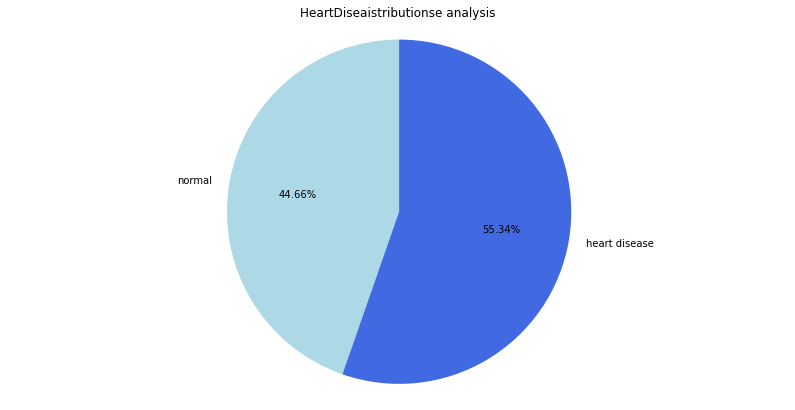

In [3]:
plt.figure(figsize=(14, 7))
labels=['normal', 'heart disease']
plt.pie(df['HeartDisease'].value_counts().sort_values(),labels=labels,
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('HeartDiseaistributionse analysis')
plt.axis('equal')
plt.show()

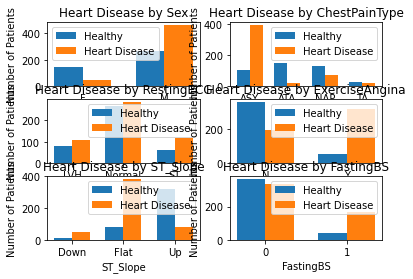

In [4]:
cat_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
# numeric variables
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# label
label = 'HeartDisease'

def display_barchart(data, vars, label):
    fig, ax = plt.subplots(3,2)
    n=0
    i=0
    for var in vars:
        # calculates the count of patients in each catagory vs heart disease
        grp = data.groupby([var, label])[var].count().unstack().reset_index()

        labels = list(grp.iloc[:, 0].values)
        no_dis = list(grp.iloc[:, 1].values)  # no heart disease patients
        yes_dis = list(grp.iloc[:, 2].values)  # heart disease patients

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        rects1 = ax[n,i].bar(x - width / 2, no_dis, width, label='Healthy')
        rects2 = ax[n,i].bar(x + width / 2, yes_dis, width, label='Heart Disease')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[n,i].set_ylabel('Number of Patients')
        ax[n,i].set_xlabel(var)
        ax[n,i].set_title('Heart Disease by ' + var)
        ax[n,i].set_xticks(x)  # values
        ax[n,i].set_xticklabels(labels)  # labels
        ax[n,i].legend()
        i=i+1
        if i==2:
            n=n+1
            i=0
    plt.show()
display_barchart(df, cat_vars, label)

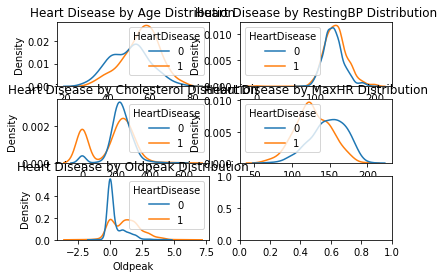

In [5]:
def display_kdechart(data, vars, label):
    fig, ax = plt.subplots(3,2)
    n=0
    i=0
    for var in vars:
        sns.kdeplot(var, hue='HeartDisease', data=data,ax=ax[n,i])
        ax[n,i].set_title('Heart Disease by ' + var + ' Distribution')
        i=i+1
        if i==2:
            n=n+1
            i=0
    plt.show()
display_kdechart(df, num_vars, label)

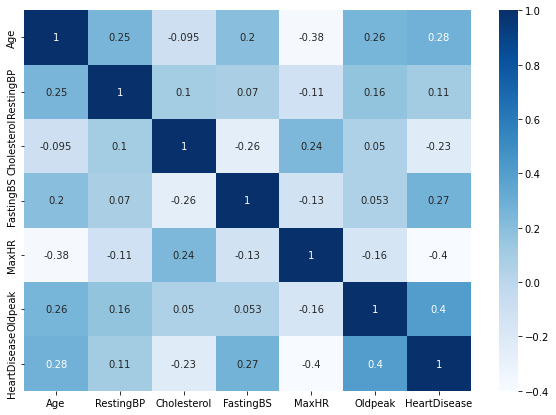

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

In [7]:
df_e=pd.get_dummies(df)
X=df_e.drop(['HeartDisease'],axis=1)
y=df_e['HeartDisease']

scaler=StandardScaler()
X=scaler.fit_transform(X)
# print(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape[0], y_test.shape[0])

642 276


In [8]:


def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return np.mean(scores)







In [9]:
scores=[]
cv_scores=[]
models_name=['LogisticRegression','RandomForest','SVC','MLP','GaussianNB']

In [10]:
Model_LR=LogisticRegression(solver='liblinear')

#Fit and predict
Model_LR.fit(X_train,y_train)
y_pred=Model_LR.predict(X_test)

#Get scores
scores.append(accuracy_score(y_test,y_pred))
cv_scores.append(evaluate_model(Model_LR,X,y))

In [11]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



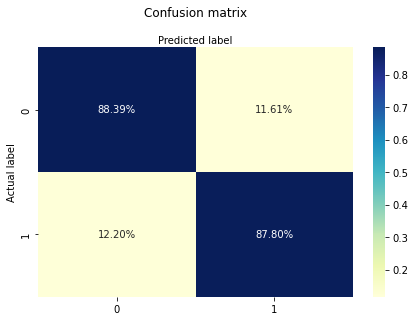

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred).astype(np.float64)
cm_shape=cnf_matrix.shape
total=np.sum(cnf_matrix,1)
for i in range(cm_shape[0]):
    for n in range(cm_shape[1]):
        cnf_matrix[i][n]=cnf_matrix[i][n]/total[i]


import matplotlib.pyplot as plt
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='.2%')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
Model_RF=RandomForestClassifier(n_estimators=200,max_depth=5,
                                min_samples_split=2,min_samples_leaf=2,
                                criterion='entropy')

#Fit and predict
Model_RF.fit(X_train,y_train)
y_pred=Model_RF.predict(X_test)

#Get scores
scores.append(accuracy_score(y_test,y_pred))
cv_scores.append(evaluate_model(Model_RF,X,y))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



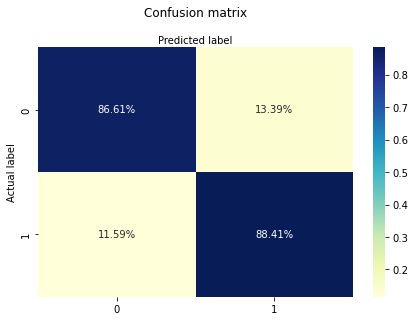

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred).astype(np.float64)
cm_shape=cnf_matrix.shape
total=np.sum(cnf_matrix,1)
for i in range(cm_shape[0]):
    for n in range(cm_shape[1]):
        cnf_matrix[i][n]=cnf_matrix[i][n]/total[i]


import matplotlib.pyplot as plt
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='.2%')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
Model_SVC=SVC(gamma='scale')

#Fit and predict
Model_SVC.fit(X_train,y_train)
y_pred=Model_SVC.predict(X_test)

#Get scores
scores.append(accuracy_score(y_test,y_pred))
cv_scores.append(evaluate_model(Model_SVC,X,y))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       112
           1       0.91      0.91      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



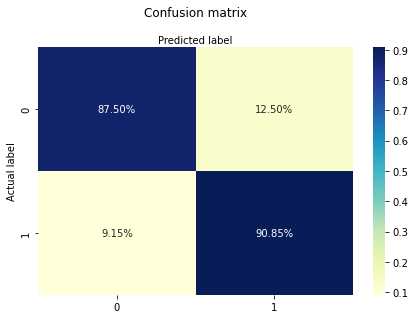

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred).astype(np.float64)
cm_shape=cnf_matrix.shape
total=np.sum(cnf_matrix,1)
for i in range(cm_shape[0]):
    for n in range(cm_shape[1]):
        cnf_matrix[i][n]=cnf_matrix[i][n]/total[i]


import matplotlib.pyplot as plt
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='.2%')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier
Model_MLP = MLPClassifier(random_state=0, max_iter=3000)

#Fit and predict
Model_MLP.fit(X_train,y_train)
y_pred=Model_MLP.predict(X_test)

#Get scores
scores.append(accuracy_score(y_test,y_pred))
cv_scores.append(evaluate_model(Model_MLP,X,y))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       112
           1       0.94      0.84      0.88       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276



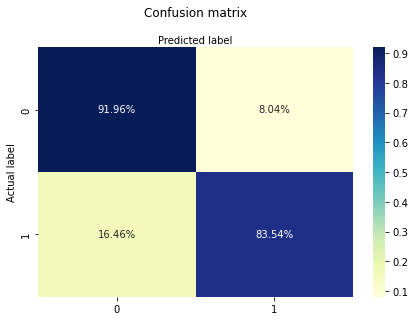

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred).astype(np.float64)
cm_shape=cnf_matrix.shape
total=np.sum(cnf_matrix,1)
for i in range(cm_shape[0]):
    for n in range(cm_shape[1]):
        cnf_matrix[i][n]=cnf_matrix[i][n]/total[i]


import matplotlib.pyplot as plt
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='.2%')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB
Model_NB = GaussianNB()

#Fit and predict
Model_NB.fit(X_train,y_train)
y_pred=Model_NB.predict(X_test)

#Get scores
scores.append(accuracy_score(y_test,y_pred))
cv_scores.append(evaluate_model(Model_NB,X,y))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.93      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



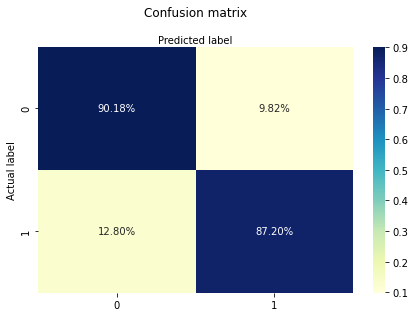

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred).astype(np.float64)
cm_shape=cnf_matrix.shape
total=np.sum(cnf_matrix,1)
for i in range(cm_shape[0]):
    for n in range(cm_shape[1]):
        cnf_matrix[i][n]=cnf_matrix[i][n]/total[i]


import matplotlib.pyplot as plt
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='.2%')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
print(len(cv_scores))
print(len(scores))
print(len(models_name))

5
5
5


In [22]:
pd.DataFrame({'Model':models_name,'Validation Score':scores,'Cross_Validation Score':cv_scores}).style.background_gradient()

,Model,Validation Score,Cross_Validation Score
0,LogisticRegression,0.880435,0.864496
1,RandomForest,0.876812,0.872338
2,SVC,0.894928,0.866230
3,MLP,0.869565,0.839863
4,GaussianNB,0.884058,0.858614


Text(0.5, 1.0, 'Feature Importance')

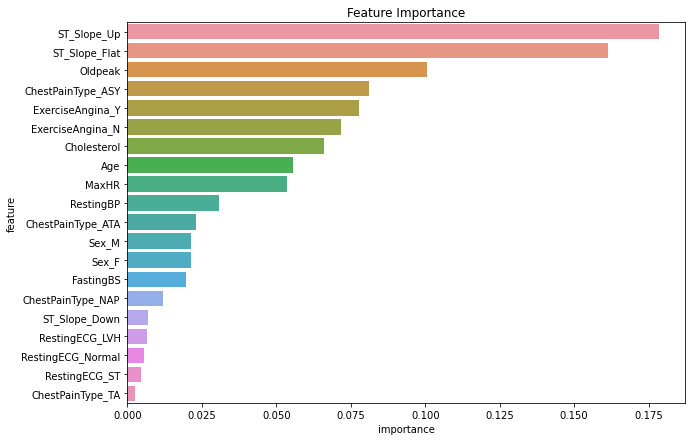

In [23]:
tmp=pd.DataFrame({'feature':df_e.drop('HeartDisease',axis=1).columns,
                 'importance':Model_RF.feature_importances_}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=tmp.importance ,y=tmp.feature).set_title('Feature Importance')
